In [1]:
# Useful modules:
# https://pythonhosted.org/lineid_plot/
# https://github.com/maartenbreddels/ipyvolume

In [2]:
%autosave 20
%matplotlib inline
from matplotlib import rcParams
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
import numpy as np

# Recommended for any plot for a science publication.
# Some paper submision systems (e.g. MNRAS) requires next lines to be done for your pictures.
# Read more about font types: https://en.wikipedia.org/wiki/PostScript_fonts
rcParams['ps.fonttype'] = 42
rcParams['pdf.fonttype'] = 42

rcParams['font.size'] = 14

# Render text with TeX
rcParams['text.usetex'] = True  # You should have working latex in your $PATH

# Font specification example:
# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Times New Roman'

# For Russian
rcParams['text.latex.unicode'] = True
rcParams['text.latex.preamble'] = r'\usepackage[T2A]{fontenc}'  # All other useful packages

Autosaving every 20 seconds


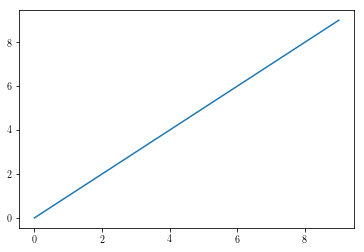

In [3]:
# The simpliest example
plt.plot(range(10))
plt.savefig('/tmp/fig1.png')

In [4]:
x_model = np.linspace(-1, 1, 100)
sigma = 0.2
model = np.exp(-x_model**2 / (2 * sigma**2))
noise_strength = 0.2
noise = 0.5 * noise_strength * np.random.uniform(-1, 1, model.shape)
error = np.abs(np.random.normal(scale=noise_strength))
obs_index = slice(None,None,5)
x_obs = x_model[obs_index]
obs = model + noise

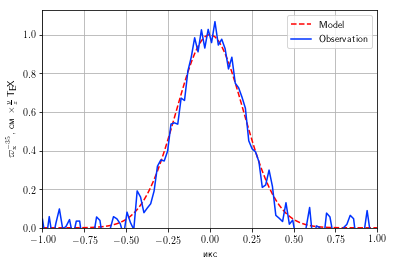

In [5]:
plt.cla()
plt.xlabel(r'икс')
plt.ylabel(r'$\varpi_\mathrm{x}^{-35}$, см $\times \frac{y}{z}$ \TeX')
plt.plot(x_model, model, 'r--', label='Model')  # "r" for red, "--" for type of line
plt.plot(x_model, obs, color='#0033ff', label='Observation')
plt.xlim([x_model.min(), x_model.max()])
plt.ylim([0, None])
plt.grid()
plt.legend(loc='best')
# plt.savefig('/tmp/fig2.pdf')

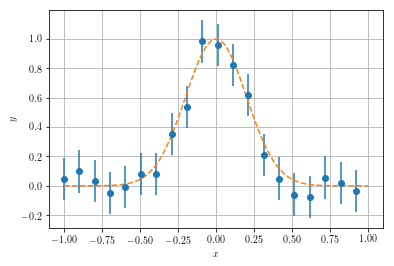

In [6]:
plt.cla()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.errorbar(x_obs, obs[obs_index], error, linestyle='None', marker='o')
plt.plot(x_model, model, '--', label='Model')
plt.grid()

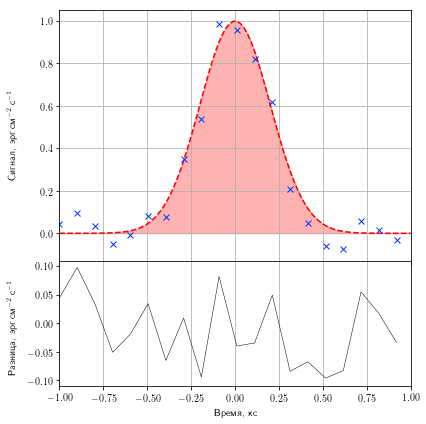

In [7]:
fig, ax = plt.subplots(
    2, 1,
    figsize=(6,6),  # inches
    sharex=True,  # use the same x-axis for both plots
    gridspec_kw={
        'height_ratios': [2, 1],  # ratio between pannels
        'hspace': 0,
    }  
)
ax1, ax2 = ax  # ax is a list of subplots

units = r', эрг\,см$^{-2}$\,с$^{-1}$'

def ylabel_coords(ax):
    return -0.12, np.mean(ax1.get_ylim())

ax1.set_ylabel('Сигнал' + units)
ax1.get_yaxis().set_label_coords(*ylabel_coords(ax1))
ax1.plot(x_model, model, 'r--', label='Model')  # "r" for red, "--" for type of line
ax1.fill_between(x_model, model, color='r', alpha=0.3)
ax1.plot(x_obs, obs[obs_index], 'x', color='#0033ff', label='Observation')
ax1.set_xlim([x_model.min(), x_model.max()])
ax1_grid = ax1.grid()

ax2.set_xlabel('Время, кс')
ax2.set_ylabel('Разница' + units)
ax2.get_yaxis().set_label_coords(*ylabel_coords(ax2))
ax2.plot(x_obs, noise[obs_index], 'k-', label=None, lw=0.5)  # lw - line width
ax2.set_ylim([-0.55*noise_strength, 0.55*noise_strength])
ax2.grid(axis='x')

fig.tight_layout()
# fig.savefig('/tmp/fig3.pdf')

(array([  5.,  12.,  25.,  51.,  83., 138., 164., 142., 135., 116.,  64.,
         38.,  17.,   8.,   2.]),
 array([-8.23921353, -5.87810025, -3.51698697, -1.15587369,  1.2052396 ,
         3.56635288,  5.92746616,  8.28857944, 10.64969272, 13.010806  ,
        15.37191928, 17.73303256, 20.09414584, 22.45525912, 24.8163724 ,
        27.17748568]),
 <a list of 15 Patch objects>)

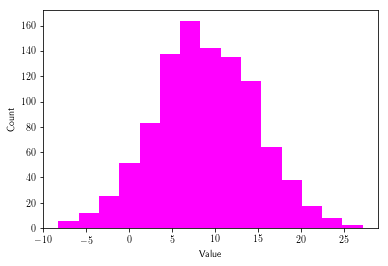

In [8]:
plt.cla()

x = np.random.normal(8.88, 5.55, size=1000)

plt.xlabel('Value')
plt.ylabel('Count')
plt.hist(x, bins=15, color='magenta')
# plt.savefig('/tmp/fig_hist.pdf')

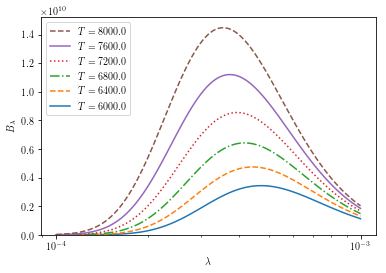

In [9]:
plt.cla()

h = 6.6e-27
kB = 1.4e-17
c = 3e10
def planck(t, lmbd):
    return 2 * h * c**2 / lmbd**5 / (np.exp(h*c/(lmbd*kB*t)))

lmbd_ = np.logspace(4, 5, 100) * 1e-8
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$B_\lambda$')
plt.xscale('log')
plt.yscale('linear')
plt.set_cmap(plt.cm.Accent)
from itertools import cycle
lines_iterator = cycle(l for l in lineStyles.keys() if ('-' in l or ':' in l))
lines = []
labels = []
for t in np.linspace(6000, 8000, 6):
    line = plt.plot(
        lmbd_,
        planck(t, lmbd_),
        next(lines_iterator),
    )[0]
    lines.append(line)
    labels.append(r'$T = {}$'.format(t))
plt.ylim([0, None])    
plt.legend(lines[::-1], labels[::-1])
# plt.savefig('/tmp/fig4.pdf')

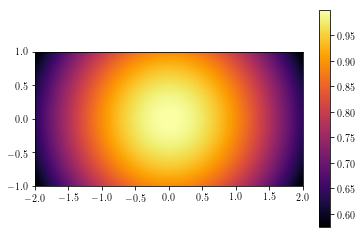

In [10]:
plt.cla()
corners = (-2, 2, -1, 1)
x_grid, y_grid = np.meshgrid(np.linspace(*corners[0:2], 100), np.linspace(*corners[2:4], 100))
z_grid = np.exp(-(x_grid**2 + y_grid**2) / 9)  # + 0.1 * np.random.rand(*x.shape)
plt.imshow(
    z_grid,
    extent=corners,
    aspect='equal',
    interpolation='bicubic',
    cmap=plt.cm.inferno,
)
plt.colorbar()
# plt.savefig('/tmp/fig5.pdf')

In [11]:
import matplotlib.image as mpimg
image_color = mpimg.imread('sombrero.png')
image_grey = image_color.mean(axis=2)  # make it greyscale
# We can load FITS using astropy:
# from astropy.io import fits
# image_grey = fits.open('sombrero.fits')[0].data[::-1]

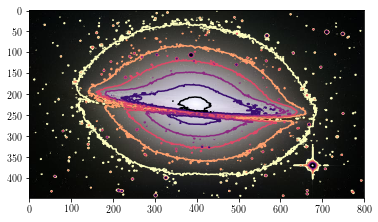

In [15]:
plt.cla()
plt.imshow(image_color)  # _r means reversed
contour = plt.contour(image_grey, cmap=plt.cm.magma_r)
# plt.savefig('/tmp/fig6.pdf')

<a list of 8 text.Text objects>

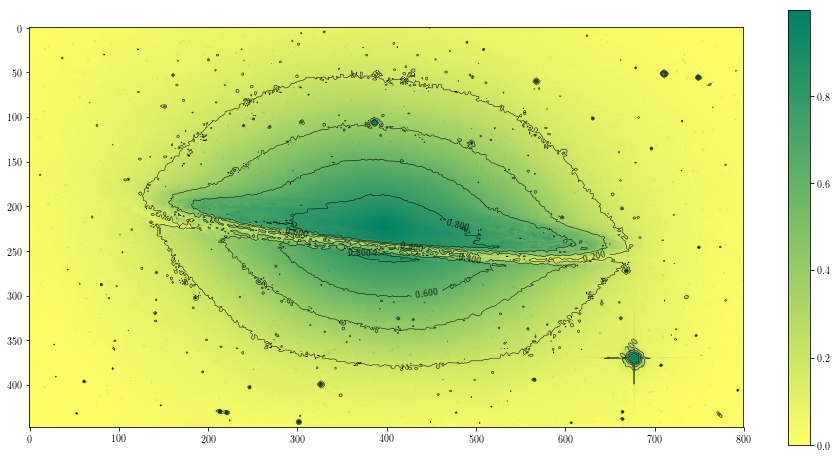

In [13]:
plt.figure(figsize=(16,8))
imshow = plt.imshow(image_grey, cmap=plt.cm.summer_r)
plt.colorbar(imshow)
contour = plt.contour(
    image_grey,
    4,  # number of levels
#     levels=[20, 50, 100, 200],  # specify levels
    colors='k',
    linewidths=0.5
)
plt.clabel(contour)
# plt.savefig('/tmp/fig7.pdf')

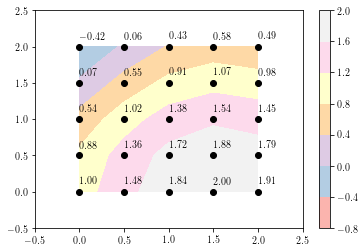

In [14]:
plt.cla()
n = 5
x_, y_ = np.meshgrid(np.linspace(0,2,n), np.linspace(0,2,n))
z_ = np.sin(x_) + np.cos(y_)
plt.contourf(
    x_, y_, z_,
    cmap=plt.cm.Pastel1
)
for i, value in np.ndenumerate(z_):
    plt.text(x_[i], y_[i]+0.1, r'${:.2f}$'.format(value))
    plt.plot(x_[i], y_[i], 'ko')    
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.colorbar()
# plt.savefig('/tmp/fig8.pdf')